# tensorFlow and Keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# !pip install tensorflow


In [4]:
import tensorflow as tf
from tensorflow import keras

2023-11-15 05:05:15.592316: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [5]:
from tensorflow.keras.preprocessing.image import load_img

In [6]:
path = './clothing-dataset-small/train/shirt'
name = '005d3a4d-b8cc-4f14-a288-8065ab797974.jpg'
fullname = f'{path}/{name}'
img = load_img(fullname, target_size=(299, 299))



In [7]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x7F601B67D0A0>


In [8]:
x = np.array(img)
# this will print all the rows of this image. Each row is a pixel. Each pixel will have the 3 RGB values

In [9]:
x.shape

(299, 299, 3)

In [10]:
# Keras is a website that has available pre-trained models for us to use.
# Can be used for fine-tuning, prediction

In [11]:
# we can use the Xception model 

In [12]:
from tensorflow.keras.applications.xception import Xception

# The preprocessing
# when the model was trained, not by us, it was done so with the data being preprocessed. So we need to do the same with the data we input.
from tensorflow.keras.applications.xception import preprocess_input

In [13]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

2023-11-15 05:05:21.608045: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-15 05:05:21.614276: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-15 05:05:21.614892: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-15 05:05:21.615836: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [14]:
# the model expects multiple images
# X = np.array([x, x, x])
# That will show that there are 3 images
# we use just one for now
X = np.array([x])




In [15]:
X.shape

(1, 299, 299, 3)

In [16]:
# What this will originally output will not make sense. This model expects the data to be preprocessed. 
# model.predict(X)

In [17]:
X = preprocess_input(X)
# Now we see that our data has been changed to be from -1 to 1 range. Now we exceute with this data

In [18]:
pred = model.predict(X)

2023-11-15 05:05:25.338343: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-11-15 05:05:25.968462: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-15 05:05:25.969267: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-15 05:05:25.969304: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-11-15 05:05:25.970295: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-15 05:05:25.970371: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 3s 3s/step


In [19]:
pred
# Much better data than before. This tells us the probability it is matches one of the images in the dataset. 

array([[2.32560342e-04, 2.12846542e-04, 1.19852426e-04, 7.49568571e-05,
        1.19066797e-04, 1.61581498e-04, 6.75981282e-05, 1.23447331e-04,
        1.60485521e-04, 1.22456928e-04, 4.74675355e-04, 2.71676254e-04,
        6.60984660e-04, 2.32002567e-04, 2.76792241e-04, 2.23493000e-04,
        2.75071390e-04, 2.70417891e-04, 1.84850593e-04, 1.70011452e-04,
        3.55559547e-04, 2.98700004e-04, 3.53321142e-04, 2.94508704e-04,
        5.12941624e-04, 1.32923655e-04, 1.85546029e-04, 1.42611301e-04,
        2.74315767e-04, 1.65594829e-04, 8.54907485e-05, 1.17409858e-04,
        2.27177123e-04, 7.04873179e-04, 6.73429633e-04, 4.60882904e-04,
        9.63302155e-04, 2.27872326e-04, 2.67112511e-04, 2.93652061e-04,
        1.16010458e-04, 3.77332966e-04, 1.44751088e-04, 5.00182272e-04,
        4.74274653e-04, 2.24588453e-04, 1.45735117e-04, 2.31766273e-04,
        2.03073942e-04, 3.41862091e-04, 4.24209866e-04, 3.02692439e-04,
        2.13900828e-04, 2.10319689e-04, 2.22380200e-04, 1.749538

## Transfer Learning
- Reading data with ImageDataGenerator
- train `Xception` on smaller images


In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [29]:
train_ds = train_gen.flow_from_directory('./clothing-dataset-small/train', target_size=(150, 150), batch_size=32)
# batch size is how many images at once
# so our shape is
# 32, 150, 150, 3

Found 3068 images belonging to 10 classes.


In [30]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [33]:
X, y = next(train_ds)

In [38]:
X.shape

(32, 150, 150, 3)

In [43]:
y[:5]
# This uses one hot encoding for the labels/classes above.
# This is an example of multi-class classification. We are fitting 10 different binary classification models into one
# So each one is -- is it pants or no, is it shirt or no, etc.

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [45]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory('./clothing-dataset-small/validation/',
                                    target_size=(150, 150),
                                    batch_size=32,
                                    shuffle=False)

Found 341 images belonging to 10 classes.


In [48]:
# Lets train the model now
# we are keeping the Conv. Layers _ the base model, and then custom the Dense Layer
# The include_top=False tells the model to not include the Dense Layers
# the botom layer is the Conv. Layer.
base_model = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

base_model.trainable = False
# This is telling it that is not trainable and we only want the Conv. layers. Freeze the Conv. Layers

In [50]:
inputs = keras.Input(shape=(150, 150, 3))

In [62]:
base = base_model(inputs)
# the output is called base

In [69]:
# pooling = keras.layers.GlobalAveragePooling2D()
# vectors = pooling(base)

In [71]:
# better way to do it
# This is known as functional style
vectors = keras.layers.GlobalAveragePooling2D()(base)

In [72]:
outputs = vectors

In [54]:
# outputs = base

In [73]:
model = keras.Model(inputs, outputs)

In [74]:
preds = model.predict(X)

1/1 [==============================] - 1s 617ms/step


In [67]:
# preds.shape
# this is a 4D - the base
# The 3D is 5, 5, 2048 -- not quite Vector Representation yet but this can made into 2D arrays

In [75]:
preds.shape
# with Pooling, its a 2D array

(32, 2048)

each 5x5 chunk can give us an average which we put into a 1D array. This is known as **pooling**

In [91]:
# we want to make this into an output of 32x10. 10 classes
base_model = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

base_model.trainable = False
# not enough to just say it once, we also need to add that this is not going to be trained again.
# Helps with accuracy
base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)


In [92]:

preds = model.predict(X)

1/1 [==============================] - 1s 657ms/step


In [81]:
preds.shape

(32, 10)

In [83]:
preds[0]

array([-0.13290857, -1.1703743 , -1.0162169 ,  0.632586  ,  0.46012786,
       -0.79713976, -0.343136  , -0.19109863, -0.53539443, -0.02525622],
      dtype=float32)

In [85]:
# now we need to train this model
# few things we need
# an Optimizer to find the best weights for our model.
# tries to change the weights so that the model is actually learning

In [97]:
# Lives in Keras.io Optimizers
# We will use Adam -- recommended
# the important one is Learning Rate, similar to ETA in trees
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
# This should be true. With false we got very low accuracy
loss = keras.losses.CategoricalCrossentropy(from_logits=True)






# a way to evaluate multi-class classification models. Uses this to check if the model is improving.
# when we apply SOFTMAX, that is known as Activation
# LOGITS is the output that we apply Softmax to

In [98]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
# # we want to make this into an output of 32x10. 10 classes
# base = base_model(inputs)

# vectors = keras.layers.GlobalAveragePooling2D()(base)

# outputs = keras.layers.Dense(10, activation='softmax')(vectors)

# model = keras.Model(inputs, outputs)


In [89]:
# preds = model.predict(X)

In [99]:
# Now we are ready to train the model
# Epoch -- how many times we want to go over the data
# we can access all the data in the History object.

# history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 14s 129ms/step - loss: 3.2695 - accuracy: 0.6483 - val_loss: 0.9506 - val_accuracy: 0.7654
Epoch 2/10
96/96 [==============================] - 12s 123ms/step - loss: 0.6064 - accuracy: 0.8201 - val_loss: 0.9330 - val_accuracy: 0.7537
Epoch 3/10
96/96 [==============================] - 12s 127ms/step - loss: 0.3975 - accuracy: 0.8641 - val_loss: 0.8129 - val_accuracy: 0.7801
Epoch 4/10
96/96 [==============================] - 12s 123ms/step - loss: 0.2613 - accuracy: 0.9061 - val_loss: 0.9042 - val_accuracy: 0.7713
Epoch 5/10
96/96 [==============================] - 12s 123ms/step - loss: 0.1749 - accuracy: 0.9364 - val_loss: 0.7797 - val_accuracy: 0.7977
Epoch 6/10
96/96 [==============================] - 12s 125ms/step - loss: 0.1034 - accuracy: 0.9645 - val_loss: 0.8916 - val_accuracy: 0.8035
Epoch 7/10
96/96 [==============================] - 12s 122ms/step - loss: 0.0746 - accuracy: 0.9772 - val_loss: 0.7877 - val_accuracy: 0.8182

In [100]:
# it begins to overfit pretty fast, we can see it turning down around Epoch 4

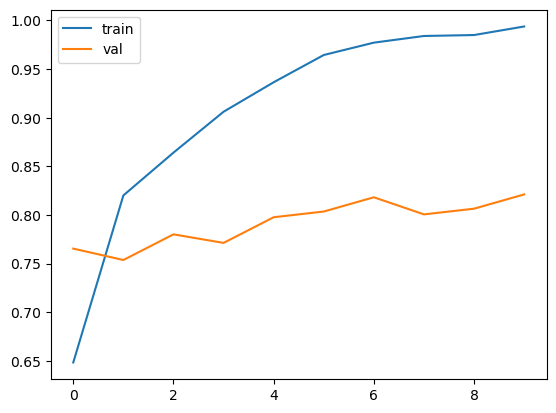

In [102]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')

plt.legend()

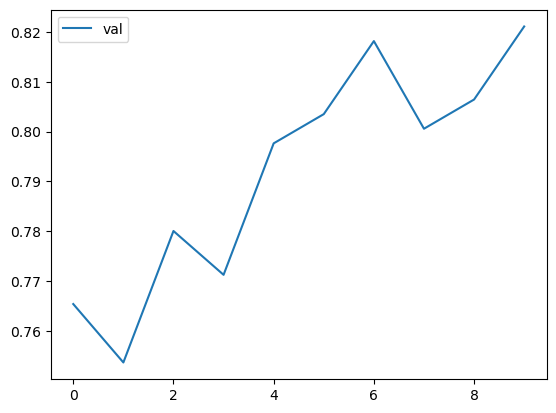

In [104]:
# plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')

plt.legend()

## Adjusting the learning Rate

In [105]:
# Whats the learning Rate??
# Imagine this is how fast you can read. 
# Low Rate -- sloooooww but effective. Maybe also poorly because we only learned a small amount. This may be under-fitting
# Fast Rate -- too fast, less effective. Poorly on Validation. This may be overfiitting
# Medium Rate - ok efficient. Good on Validation
# Important to find the right balance with our learning Rate. 
# We will try to do what we did with XGBoost

In [110]:
def make_model(learning_rate):
    # we want to make this into an output of 32x10. 10 classes
    base_model = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

    base_model.trainable = False
    
    ########################  Boiler Plate Code
    
    ################ Our model
    
    # not enough to just say it once, we also need to add that this is not going to be trained again.
    # Helps with accuracy
    inputs = keras.Input(shape=(150, 150, 3))
    
    base = base_model(inputs, training=False)

    vectors = keras.layers.GlobalAveragePooling2D()(base)

    outputs = keras.layers.Dense(10)(vectors)

    model = keras.Model(inputs, outputs)
    
    
    ##########################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    # This should be true. With false we got very low accuracy
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model


In [111]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)
    
    model = make_model(lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    
    print()
    print()

0.0001
Epoch 1/10
96/96 [==============================] - 12s 124ms/step - loss: 0.9021 - accuracy: 0.8908 - val_loss: 3.7833 - val_accuracy: 0.7683
Epoch 2/10
96/96 [==============================] - 12s 123ms/step - loss: 0.3901 - accuracy: 0.9329 - val_loss: 2.6564 - val_accuracy: 0.8035
Epoch 3/10
96/96 [==============================] - 12s 123ms/step - loss: 0.1558 - accuracy: 0.9694 - val_loss: 2.6323 - val_accuracy: 0.8006
Epoch 4/10
96/96 [==============================] - 12s 124ms/step - loss: 0.0658 - accuracy: 0.9840 - val_loss: 2.3377 - val_accuracy: 0.8123
Epoch 5/10
96/96 [==============================] - 12s 122ms/step - loss: 0.0351 - accuracy: 0.9899 - val_loss: 2.3830 - val_accuracy: 0.8152
Epoch 6/10
96/96 [==============================] - 12s 124ms/step - loss: 0.0073 - accuracy: 0.9990 - val_loss: 2.3508 - val_accuracy: 0.8065
Epoch 7/10
96/96 [==============================] - 12s 123ms/step - loss: 0.0101 - accuracy: 0.9974 - val_loss: 2.4677 - val_accuracy:

0.0001
0.001
0.01
0.1


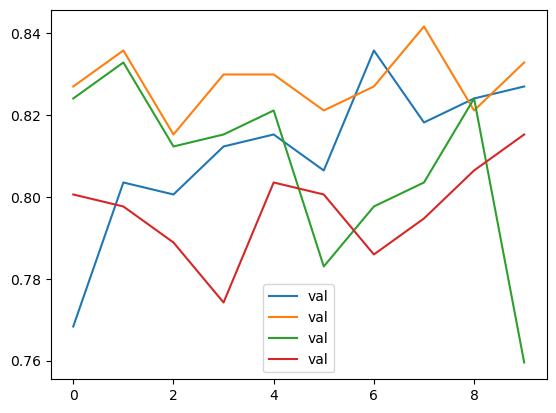

In [114]:
for lr, hist in scores.items():
    print(lr)
#     plt.plot(hist['accuracy'], label='train')
    plt.plot(hist['val_accuracy'], label='val')

    plt.legend()

In [ ]:
del scores[0.1]
del scores[0.0001]
# best learing rate should be 
learning_rate = 0.001